<a href="https://colab.research.google.com/github/safeedhaps963-lab/-dpproject.ipynb-/blob/main/deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#step 1
#import libraries
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from  torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,classification_report


In [ ]:
#step 2
#Load and clean dataset
data=pd.read_csv("/content/loan_data.csv")
#remove missing value
data.dropna(inplace=True)

In [ ]:
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,4,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,3,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,3,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,1,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,4,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,0,47971.0,6,3,15000.0,3,15.66,0.31,3.0,645,0,1
44996,37.0,0,0,65800.0,17,3,9000.0,2,14.07,0.14,11.0,621,0,1
44997,33.0,1,0,56942.0,7,3,2771.0,0,10.02,0.05,10.0,668,0,1
44998,29.0,1,1,33164.0,4,3,12000.0,1,13.23,0.36,6.0,604,0,1


In [ ]:
#step3
#encode categorical columns
label_cols = ['person_gender','person_education','person_home_ownership','loan_intent','previous_loan_defaults_on_file']

for col in label_cols:
  data[col]=LabelEncoder().fit_transform(data[col])

In [ ]:
#step 4
#prepare features and labels
x=data.drop("loan_status",axis=1).values
y=data['loan_status'].values

In [ ]:
#step 5
#normalize features
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [ ]:
#step 6
#split data into train or test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
#step 7
#convert to pytorch tensors
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)


In [ ]:
#step 8
#create DataLoaders
train_ds=TensorDataset(x_train,y_train)
test_ds=TensorDataset(x_test,y_test)
train_loader=DataLoader(train_ds,batch_size=32,shuffle=True)
test_loader=DataLoader(test_ds,batch_size=32)


In [ ]:
#step 9
#define the neural network
class LoanClassifier(nn.Module):
  def __init__(self):
        super(LoanClassifier,self).__init__()
        self.net = nn.Sequential(
            nn.Linear(13,64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64,32),
            nn.ReLU(),
            nn.Linear(32,2)
        )
  def forward(self, x):
        return self.net(x)
model=LoanClassifier()

In [ ]:
#step 10
#Define loss function and optimizer
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)

In [ ]:
#step 11
#Train the Model
for epoch in range(100):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        outputs = model(xb)
        loss = criterion(outputs, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}")


Epoch 1, Loss: 0.2638
Epoch 2, Loss: 0.2235
Epoch 3, Loss: 0.2176
Epoch 4, Loss: 0.2138
Epoch 5, Loss: 0.2097
Epoch 6, Loss: 0.2061
Epoch 7, Loss: 0.2034
Epoch 8, Loss: 0.2025
Epoch 9, Loss: 0.2010
Epoch 10, Loss: 0.1985
Epoch 11, Loss: 0.1978
Epoch 12, Loss: 0.1963
Epoch 13, Loss: 0.1948
Epoch 14, Loss: 0.1941
Epoch 15, Loss: 0.1933
Epoch 16, Loss: 0.1927
Epoch 17, Loss: 0.1936
Epoch 18, Loss: 0.1914
Epoch 19, Loss: 0.1908
Epoch 20, Loss: 0.1905
Epoch 21, Loss: 0.1888
Epoch 22, Loss: 0.1881
Epoch 23, Loss: 0.1887
Epoch 24, Loss: 0.1886
Epoch 25, Loss: 0.1887
Epoch 26, Loss: 0.1879
Epoch 27, Loss: 0.1865
Epoch 28, Loss: 0.1869
Epoch 29, Loss: 0.1887
Epoch 30, Loss: 0.1871
Epoch 31, Loss: 0.1874
Epoch 32, Loss: 0.1859
Epoch 33, Loss: 0.1862
Epoch 34, Loss: 0.1857
Epoch 35, Loss: 0.1858
Epoch 36, Loss: 0.1855
Epoch 37, Loss: 0.1859
Epoch 38, Loss: 0.1846
Epoch 39, Loss: 0.1856
Epoch 40, Loss: 0.1854
Epoch 41, Loss: 0.1845
Epoch 42, Loss: 0.1855
Epoch 43, Loss: 0.1837
Epoch 44, Loss: 0.18

In [ ]:
#Step 12
#Evaluate the model
model.eval()
preds = []
y_true = []
with torch.no_grad():
    for xb, yb in test_loader:
        outputs = model(xb)
        _, predicted = torch.max(outputs, 1)
        preds.extend(predicted.tolist())
        y_true.extend(yb.tolist())

print("\nAccuracy:", accuracy_score(y_true, preds))
print("\nClassification Report:\n", classification_report(y_true, preds))


Accuracy: 0.9163333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      6990
           1       0.88      0.73      0.79      2010

    accuracy                           0.92      9000
   macro avg       0.90      0.85      0.87      9000
weighted avg       0.91      0.92      0.91      9000



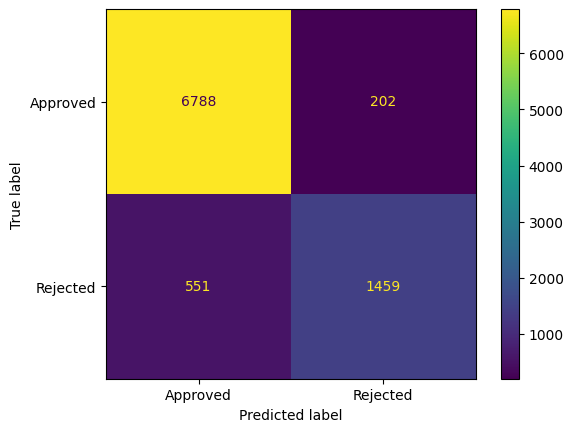

In [ ]:
#Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Approved", "Rejected"])
disp.plot()
plt.show()

In [ ]:
#Save model weights
torch.save(model.state_dict(), 'loan_classifier_model.pt')
print("Model saved as loan_classifier_model.pt")

Model saved as loan_classifier_model.pt
